In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [2]:
def zerosin(x):
    """
    finds minimums of |sin(x)| like functions
    """
    #x2 = x*x
    x2 = np.abs(x)
    x2_0 = np.where(x2<1/2)[0]
    x2_0_range = [0] + list(np.where(np.diff(x2_0)>1)[0]) + [len(x2_0)-1]
    x2_0_range = sorted(list(set(x2_0_range)))

    x2_0_mins = []
    for i in range(len(x2_0_range)-1):
        try:
            x2_0_min = min(x2[x2_0[x2_0_range[i]+1]:x2_0[x2_0_range[i+1]]])
            x2_0_mins += [np.where(x2==x2_0_min)[0][0]]
        except:
            pass # there is no valid root
    return x2_0_mins

In [3]:
hbar, m = symbols('hbar, m', real=True, positive=True)
En, V0, a = symbols('E_n, V_0, a', real=True, positive=True)
uE = symbols('uE')

In [4]:
ka = lambda En, a: a * sqrt(2*m*En)/hbar
qa = lambda En, a, V0: a * sqrt(2*m*(V0 - En))/hbar
En_qa = lambda uE, a, V0: -solve(qa(En, a, V0)-uE, En)[0]

In [5]:
constants = {hbar: 2, m:2}

v = lambdify((En, a), ka(En, a).subs(constants))
u = lambdify((En, a, V0), qa(En, a, V0).subs(constants))
Enu = lambdify((uE, a, V0), En_qa(uE, a, V0).subs(constants))

In [6]:
a00, V00 = 2, 35
Espace = np.linspace(1e-6, V00, 2500)
uspace = u(Espace, a00, V00 + 1e-6)
vspace = v(Espace, a00)
uspace_max = max(uspace)

eqTan = uspace*np.tan(uspace)
eqCoTan = -uspace/np.tan(uspace)
eqTan[:-1][np.diff(eqTan) < -uspace_max] = np.nan
eqCoTan[:-1][np.diff(eqCoTan) < -uspace_max] = np.nan

# Tan ve CoTan denklemleri yeniden düzenlendi
eqEven = vspace*np.cos(uspace)-uspace*np.sin(uspace)
eqOdd = vspace*np.sin(uspace)+uspace*np.cos(uspace)

uEvenRoots = [uspace[i] for i in zerosin(eqEven)]
vEvenRoots = [vspace[i] for i in zerosin(eqEven)]

uOddRoots = [uspace[i] for i in zerosin(eqOdd)]
vOddRoots = [vspace[i] for i in zerosin(eqOdd)]

lenUV = len(uEvenRoots) + len(uOddRoots)

In [7]:
EnEven = [(Enu(ui, a00, V00), ui, vEvenRoots[i]) for i, ui in enumerate(uEvenRoots)]
EnOdd = [(Enu(ui, a00, V00), ui, vOddRoots[i]) for i, ui in enumerate(uOddRoots)]
Ens = sorted(EnEven + EnOdd)

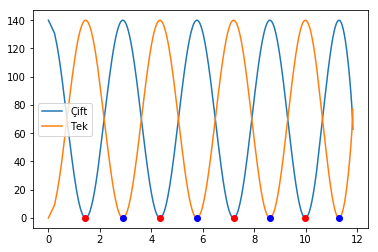

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(uspace, eqEven*eqEven, label=u"Çift")
plt.plot(uspace, eqOdd*eqOdd, label=u"Tek")
plt.plot(uEvenRoots, [0]*len(vEvenRoots), "ro")
plt.plot(uOddRoots, [0]*len(vOddRoots), "bo")


plt.legend(loc='best')
plt.show()

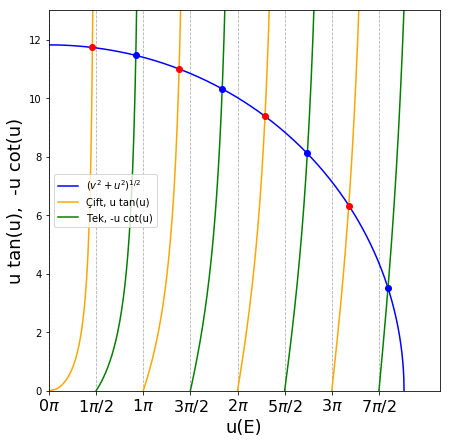

In [9]:
plt.figure(figsize=(7, 7))

plt.plot(uspace, vspace, label="$(v^2 + u^2)^{1/2}$", color="blue")
plt.plot(uspace, eqTan, label=u"Çift, u tan(u)", color="orange")
plt.plot(uspace, eqCoTan, label=u"Tek, -u cot(u)", color="green")
plt.plot(uEvenRoots, vEvenRoots, "ro")
plt.plot(uOddRoots, vOddRoots, "bo")

plt.xlim(0, uspace_max*1.1)
plt.ylim(0, uspace_max*1.1)

plt.xlabel('u(E)', fontsize=18)
plt.ylabel('u tan(u),  -u cot(u)', fontsize=18)

plt.xticks([i*np.pi/2 for i in range(lenUV)],
          [r"${}\pi/2$".format(i) if i%2==1 else r"${}\pi$".format(int(i/2)) for i in range(lenUV)], fontsize=16)


plt.legend(loc='best')
plt.grid(axis='x', linestyle="--")
plt.show()

In [10]:
print("n      En       u(En)         v(En)   Parite" )
for ni, Eni in enumerate(Ens):
    parite = "Çift" if ni%2==0 else "Tek"
    print("{} & {:9.5f} &  {:9.5f} &  {:9.5f} & {} \\\\".format(ni+1, *Eni, parite))

n      En       u(En)         v(En)   Parite
1 & -34.48179 &    1.43973 &   11.74424 & Çift \\
2 & -32.89916 &    2.89886 &   11.47156 & Tek \\
3 & -30.29412 &    4.33861 &   11.00802 & Çift \\
4 & -26.66667 &    5.77350 &   10.32796 & Tek \\
5 & -22.04482 &    7.19866 &    9.39038 & Çift \\
6 & -16.47059 &    8.60916 &    8.11679 & Tek \\
7 & -10.04202 &    9.99159 &    6.33783 & Çift \\
8 &  -3.09524 &   11.29686 &    3.51866 & Tek \\


In [11]:
# u^2 + v^2 = 2m/hbar^2 V0 a^2
(uspace**2 + vspace**2)/a00**2

array([35.000001, 35.000001, 35.000001, ..., 35.000001, 35.000001,
       35.000001])